# Kryptografia z kluczem tajnym (symetryczna): szyfry strumieniowe
### Literatura:
1. Nowoczesna kryptografia, Aumasson
2. Kryptografia dla praktyków, Schneier

#### Funkcje pomocnicze
Zadaniem poniższego zestawu funkcji jest zamiana wiadomości tekstowej (poprzez kody ASCII) do (tekstowego) ciągu 0 i 1. Chcemy analizować funkcje tak jak są one opisane w książkach.


In [1]:
# Funkcje pomocnicze 
from textwrap import wrap
import math 
from codecs import encode

#tablica znaków w tablicę kodów int
def intoASCIIArray(message: str):
    int_array = []
    mesg_array = list(message) 
    for i in mesg_array:
        int_array.append(ord(i))
    return int_array

#tablica kodów int w tablice znaków 
def intoCharArray(message: []):
    mesg_char = []
    for i in message:
        mesg_char.append(chr(i))
    return mesg_char

# jak wyświetlić dane w postaci binarnej na n bitach 
get_bin = lambda x, n: format(x, 'b').zfill(n)

#tekst ascii w postaci tablicy 8-bitowych porcji
def ASCIIToBinChunks(message_list):
    binary = []
    for x in message_list: 
        binary.append(get_bin(x, 8))
    return binary

#tekst ascii w formie strumienia bitów 
def ASCIIToBinStream(binary: []):
    binary_str = ""
    for x in binary:
        binary_str+=x 
    return binary_str


# Przykłady

# Liczba 200 w zapisie binarnym 
l = 200
bl = get_bin(l,8)
print("Liczba 200 w zapisie binarnym na 8 bitach:", bl)
bl = get_bin(l,16)
print("Liczba 200 w zapisie binarnym na 16 bitach:", bl)


messageTxt = 'The quick brown fox jumps over the lazy dog'
messageASCII = intoASCIIArray(messageTxt)
print("Tekst w formie kodów ASCII: ",messageASCII)
messageASCIIBinChunks = ASCIIToBinChunks(messageASCII)
print("Tekst w formie porcji bitów:", messageASCIIBinChunks)
messageASCIIBinStream = ASCIIToBinStream(messageASCIIBinChunks) 
print("Tekst w postaci ciągu 0 i 1:", messageASCIIBinStream)
print()        


#Operatory logiczne działające na napisach bitów 
def XOR(bits1,bits2):
    """perform a XOR operation and return the output"""
    xor_result = ""
    for index in range(len(bits1)):
        if bits1[index] == bits2[index]: 
            xor_result += '0'
        else:
            xor_result += '1'
    return xor_result  

def AND(bits1,bits2):
    """perform a AND operation and return the output"""
    and_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '1') and  (bits2[index] == '1'): 
            and_result += '1'
        else:
            and_result += '0'
    return and_result  

def OR(bits1,bits2):
    """perform a OR operation and return the output"""
    or_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '0') and  (bits2[index] == '0'): 
            or_result += '0'
        else:
            or_result += '1'
    return or_result  

def NEG(bits):
    """perform a NEG operation and return the output"""
    neg_result = ""
    for index in range(len(bits)):
        if (bits[index] == '0'): 
            neg_result += '1'
        else:
            neg_result += '0'
    return neg_result  

print("AND", AND('0101010001101', '0101010001100'))    
print("OR", OR('0101010001101', '0101010001100')) 
print("XOR", XOR('0101010001101', '0101010001100')) 
print("NEG", NEG('0101010001101')) 

Liczba 200 w zapisie binarnym na 8 bitach: 11001000
Liczba 200 w zapisie binarnym na 16 bitach: 0000000011001000
Tekst w formie kodów ASCII:  [84, 104, 101, 32, 113, 117, 105, 99, 107, 32, 98, 114, 111, 119, 110, 32, 102, 111, 120, 32, 106, 117, 109, 112, 115, 32, 111, 118, 101, 114, 32, 116, 104, 101, 32, 108, 97, 122, 121, 32, 100, 111, 103]
Tekst w formie porcji bitów: ['01010100', '01101000', '01100101', '00100000', '01110001', '01110101', '01101001', '01100011', '01101011', '00100000', '01100010', '01110010', '01101111', '01110111', '01101110', '00100000', '01100110', '01101111', '01111000', '00100000', '01101010', '01110101', '01101101', '01110000', '01110011', '00100000', '01101111', '01110110', '01100101', '01110010', '00100000', '01110100', '01101000', '01100101', '00100000', '01101100', '01100001', '01111010', '01111001', '00100000', '01100100', '01101111', '01100111']
Tekst w postaci ciągu 0 i 1: 0101010001101000011001010010000001110001011101010110100101100011011010110010000

In [2]:
# Generowanie losowych danych: funkcje i algorytmy pomocnicze 
import random
random.seed("key")  #generator PRNG w python można inicjalizować tekstem

# jak wygenerować 8 losowych bitów (razy n)
def randomBytes(n):
    return bytes(random.getrandbits(8) for i in range(n))

def randomByte():
    return random.randint(0,255)

def randomByteBin():
    return get_bin(random.randint(0,255),8)

#jak wygenerować ciąg losowych bajtów
random_stream_chunks = []
for i in range(8):
    random_stream_chunks.append(randomByteBin())

print("Losowe bajty:", random_stream_chunks)
    
randomBinaryString = ""    
for i in random_stream_chunks:
    randomBinaryString+=i

print("Strumień bitów:", randomBinaryString)
    
print("Pojedyncze losowe bajty:", end="")
bits1 = randomByteBin()
bits2 = get_bin(randomByte(),8)
print(bits1, bits2)

Losowe bajty: ['10001110', '11111000', '11000111', '11110101', '11101100', '01010100', '00111110', '10011110']
Strumień bitów: 1000111011111000110001111111010111101100010101000011111010011110
Pojedyncze losowe bajty:10000110 00000010


### Zadanie samodzielne dla studentów
Zaimplementuj szyfr, który utajnia strumień wiadomości jawnej przez łączenie go z pseudolosowym strumieniem 


In [3]:
s='''Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eget augue eget sem sodales ultrices. Quisque dapibus, urna sit amet.'''
%store s >plaintext.txt
h = open("plaintext.txt", "r")

random.seed("shrek")

text_bin_chunks = ASCIIToBinChunks(intoASCIIArray(s))

ciphertext_chunks = [XOR(text_byte, randomByteBin()) for text_byte in text_bin_chunks]

ciphertext = ''.join(map(lambda chunk: chr(int(chunk, 2)), ciphertext_chunks))

print(ciphertext_chunks)
print(ciphertext)

Writing 's' (str) to file 'plaintext.txt'.
['01000011', '11100110', '00000010', '01100010', '00000110', '00100000', '01110011', '11110000', '00100011', '10111111', '10100100', '00111110', '00100111', '11110110', '11011001', '10110000', '00011000', '01000011', '10111011', '10101001', '11110101', '11011100', '10110100', '01010100', '10011100', '10100001', '10011100', '10000110', '00111101', '10010000', '01011111', '01101101', '11100100', '00011110', '00110101', '11110100', '00011101', '10010100', '00100100', '11101000', '10111011', '10100010', '11000101', '11110000', '01110000', '11111100', '00111000', '00110100', '01000111', '01001110', '00001000', '00010101', '10110010', '11110110', '11100000', '00011111', '00010100', '11010101', '10100110', '01101100', '11110010', '01100011', '00101101', '11000000', '10111100', '10001111', '00101000', '11001101', '01011010', '10111111', '10010101', '10000000', '10100101', '11010111', '00101001', '10100001', '10010000', '11101100', '00011101', '1000001

### Linear congruential generators (LCG)
Generatory liniowe kongruentne sa najprostszymi generatorami dającymi ciągi liczb o dobrych własnościach statystycznych. Kolejne wyrazy ciągu generowane sa przy pomocy formuły:

$z_{i+1}=(a\cdot z_i+c)\bmod m$

Wyraz $z_0$ nazywany jest ziarnem (_seed_). Użycie tego samego ziarna gwarantuje nam wyprodukowanie tej samej sekwencji liczb.

Charakterystyczną cechą GLK jest ich okresowość. Oczekujemy możliwie najdłuższego okresu (maksymalny to $m-1$). Najdłuższy okres otrzymamy gdy spełnione są pewne warunki (twierdzenie Hull'a-Dobell'a):

- $c$ i $m$ są względnie pierwsze, 
- $a-1$ jest podzielne przez wszystkiem pierwsze czynniki $m$,
- $a-1$ jest wielokrotnoścą 4 jeśli $m$ jest wielokrotnością 4.

Przykładowe dobre wartości to $a=1103515245$, $c=12345$ dla $m=2^{31}$ 

Zazwyczaj generator zwraca wartość $\frac{z_i}{m}$, ale wyjście można przeskalować do dowolnej innej wartości. 

Obecnie większość PRNG to tzw. _Mersenne twister_, ale ogólna idea ich użytkowania i własności jest taka sama jak w przypadku generatorów kongruentnych. 

In [4]:
def lcg(x, a, c, m):
    while True:
        x = (a * x + c) % m
        yield x
        
def random_uniform_sample(n, interval, seed=0):
    a, c, m = 1103515245, 12345, 2 ** 31
    bsdrand = lcg(seed, a, c, m)

    lower, upper = interval[0], interval[1]
    sample = []

    for i in range(n):
        observation = (upper - lower) * (next(bsdrand) / (2 ** 31 - 1)) + lower
        sample.append(round(observation))

    return sample

print(random_uniform_sample(100, [0,255],11))

[166, 97, 88, 33, 91, 184, 211, 119, 189, 205, 46, 8, 82, 18, 98, 253, 139, 27, 203, 49, 203, 44, 215, 76, 5, 204, 67, 84, 70, 232, 23, 190, 31, 114, 226, 213, 33, 239, 96, 162, 104, 13, 14, 12, 112, 126, 219, 108, 23, 86, 124, 87, 47, 36, 130, 187, 97, 233, 206, 39, 210, 88, 112, 86, 72, 72, 144, 215, 63, 238, 132, 236, 182, 191, 142, 108, 23, 115, 119, 207, 4, 53, 145, 53, 114, 93, 60, 125, 219, 199, 126, 74, 236, 39, 212, 15, 121, 91, 202, 235]


### Kryptograficzne generatory PRNG
Urządzenie /dev/urandom stanowi podstawę dobrego generatora CPRNG

In [5]:
import os
import struct

# random integer using os.urandom()
print(struct.unpack('i', os.urandom(4)))
# Output (258871565,)

# unsigned random integer using os.urandom()
print(struct.unpack('I', os.urandom(4)))
print(struct.unpack('I', os.urandom(4))[0] % 100)
# Output (1015967885,)

# random short number using os.urandom()
print(struct.unpack('h', os.urandom(2)))
# Output (-28882,)

# unsigned random short using os.urandom()
print(struct.unpack('H', os.urandom(2)))
# Output (29492,)

# Print random float using os.urandom()
print(struct.unpack('f', os.urandom(4)))
# Output (-4.651611836498911e+20,)

# un-singed random decimal using os.urandom()
print(struct.unpack('d', os.urandom(8)))
# Output (-1.7024488468332834e-120,)

# random char using os.urandom()
print(struct.unpack('c', os.urandom(1)))
# Output (b'\xce',)

(1918847283,)
(408503176,)
42
(27418,)
(40161,)
(1.0719511788199618e+24,)
(-3.8840910985897914e+58,)
(b'\xfe',)


### Zastanów się: 
1. Poszukaj informacji o szyfrach binarnie addytywnych 


Binarny addytywny szyfr strumieniowy to synchroniczny szyfr strumieniowy, w którym strumień klucza, wiadomość oraz szyfrogram są elementami binarnymi, a funkcja wynikowa h jest funkcją XOR.

2. Poszukaj informacji o szyfrach strumieniowych używanych w praktyce. Gdzie takie szyfry mogą być obecnie stosowane?

Szyfry strumieniowe są używane tam, gdzie dane pojawiają się w nieznanej długości porcjach – np., w bezpiecznych połączeniach bezprzewodowych. Szyfry blokowe w takich sytuacjach byłyby nieodpowiednie bo transmitowane byłyby niepotrzebne porcje danych – dopełnienia właściwych danych do pełnego bloku.

### Problem 
Utwórz dwie różne wiadomości równej długości. Zaszyfruj je szyfrem XOR z użyciem tego samego klucza. Wyznacz alternatywę rozłączną szyfrogramów (XOR) i porównaj ją z tą samą operacją wykonaną dla tekstów jawnych. 

*Z oczywistych względów jeśli obie wiadomości zaszyfrujemy szyfrem XOR z tym samym kluczem to XOR wiadomości jest równy XOR szyfrogramów. Wystarczyłoby np. zdobyć/odgadnąć jeden tekst jawny*  

In [6]:
message1 = 'secret'
message2 = 'poufny'
key = 'shrek'

def encrypt(message, key):
    message_chunks = ASCIIToBinChunks(intoASCIIArray(message))
    key_chunks = ASCIIToBinChunks(intoASCIIArray(key))
    return [XOR(message_chunks[i], key_chunks[i % len(key_chunks)]) for i in range(len(message))]

xor_message1 = encrypt(message1, key)
xor_message2 = encrypt(message2, key)

messages_xor = [XOR(bit1, bit2) for bit1, bit2 in zip(ASCIIToBinChunks(intoASCIIArray(message1)), ASCIIToBinChunks(intoASCIIArray(message2)))]
ciphers_xor = [XOR(bit1, bit2) for bit1, bit2 in zip(xor_message1, xor_message2)]

print(xor_message1)
print(xor_message2)
print(messages_xor)
print(ciphers_xor)
print(all(bit1 == bit2 for bit1, bit2 in zip(messages_xor, ciphers_xor)))

['00000000', '00001101', '00010001', '00010111', '00001110', '00000111']
['00000011', '00000111', '00000111', '00000011', '00000101', '00001010']
['00000011', '00001010', '00010110', '00010100', '00001011', '00001101']
['00000011', '00001010', '00010110', '00010100', '00001011', '00001101']
True


### Bezpieczeństwo szyfru XOR
1. Jakie znaczenie ma powyższy wynik z punktu widzenia kryptoanalizy?

Powyższy wynik oznacza, że znając jeden tekst jawny i jego szyfrogram to wystarczy nam poznać drugi szyfrogram, żeby korzystając z tego, że XOR dwóch tekstów jawnych jest taki sam jak XOR ich szyfrogramów, wyznaczyć bez problemu drugi tekst jawny

2. Jeśli OTP to OK.


Tak, bo szyfrując każdą wiadomość innym kluczem, zabezpieczamy się przed powyższą metodą


3. Na czym polega atak ze znanym tekstem jawnym?


Znam tekst jawny i szyfrogram. Jeśli dwie wiadomości zostały zaszyfrowane tym samym kluczem to XORy tekstów jawnych i szyfrogramów są takie same. Możemy zatem znając drugi szyfrogram uzyskać jego tekst jawny

### Problem

1. Utwórz dowolną wiadomość $M_1$. 
2. Zaszyfruj ją swoim szyfrem XOR z kluczem $K$. 
3. Wykonaj na szyfrogramie $C_1$ operację $C_2 = C_1 \oplus (111\ldots1)$. 
4. Odszyfruj wiadomość $C_2$ stosując ten sam klucz $K$. 
5. Porównaj wiadomości: $M_1$ i odszyfrowaną w poprzednim kroku $M_2$ (najlepiej binarnie). 

*Demonstrujemy deformowalność szyfrowania XOR - możemy zmodyfikować szyfrogram tak by po odszyfrowniu wiadomość była _sensownie_ powiązana z oryginalnym tekstem jawnym* 

In [7]:
message1 = 'kocham'
key = 'nie'

def decrypt(cipher, key):
    key_chunks = ASCIIToBinChunks(intoASCIIArray(key))
    decrypted_chunks = [XOR(cipher[i], key_chunks[i % len(key_chunks)]) for i in range(len(cipher))]
    return ''.join(intoCharArray([int(decrypted_chunks[i], 2) for i in range(len(decrypted_chunks))]))

c1 = encrypt(message1, key)
c2 = [XOR(byte, '11111111') for byte in c1]
decrypted = decrypt(c2, key)

print(ASCIIToBinChunks(intoASCIIArray(message1)))
print(ASCIIToBinChunks(intoASCIIArray(decrypted)))

['01101011', '01101111', '01100011', '01101000', '01100001', '01101101']
['10010100', '10010000', '10011100', '10010111', '10011110', '10010010']


# Szyfr strumieniowy RC4
*Niech studenci sobie zrobią RC4, szyfry z LFSR, ChaCha20 i Salsa20 pokaże na wykładzie. Jeśli zdąże to przygotuję notebooka z kryptoanalizą RC4* 

1. Odkryj sposób działania algorytmu RC4. Poszukaj informacji gdzie był używany RC4.

A) Inicjalizacja generatora liczb pseudolosowych:
    
    a) zainicjuj tablicę S liczbami od 0 do 255
    b) permutuj tablicę S 256 razy (i=0...255); od j=0:
        i = i + 1
        j = (j + S[i] + K[i mod KeyLength]) mod 256
        swap(S[i], S[j])
    

B) Generowanie strumienia klucza (od i,j=0):

    a) i = (i + 1) mod 256
    b) j = (j + S[i]) mod 256
    c) swap(S[i], S[j])
    d) keyStreamByte = S[(S[i]+S[j]) mod 256]
    c) cipherByte = plaintextByte^keyStreamByte

In [8]:
import codecs
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

MOD = 256
#inicjalizacja generatora szyfru RC4

def KSA(key):
    key_length = len(key)
    # inicjalizuj tablice permutacji S
    S = list(range(MOD))
    j = 0
    for i in range(MOD):
        j = (j + S[i] + key[i % key_length]) % MOD
        S[i], S[j] = S[j], S[i]

    return S

<Figure size 1500x900 with 0 Axes>

In [9]:
#generator liczb pseudolosowych RC4
def PRGA(S):
    #...
    S_ = S[:]
    i = 0
    j = 0
    while True:
        i = (i + 1) % 256
        j = (j + S_[i]) % 256
        S_[i], S_[j] = S_[j], S_[i]
        key_stream_byte = S_[(S_[i] + S_[j]) % 256]
        yield key_stream_byte

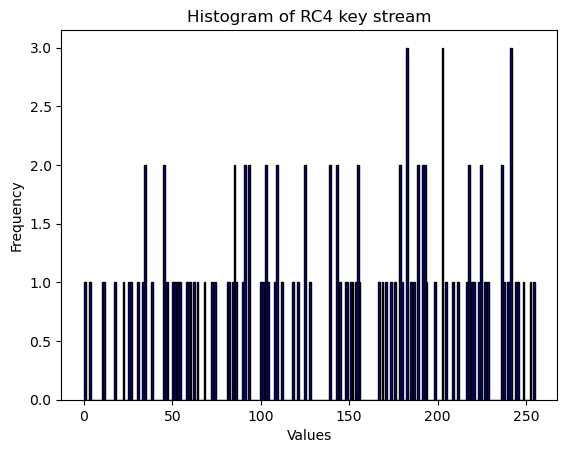

<Figure size 1500x1900 with 0 Axes>

Tekst jawny: Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.
Szyfrogram: 5D35E951F8AB6369A98A3FD2F35341B4B96AC00E048B805F1891C10D91C63851D607296EFBA4A8160CC3E2C0D4909273D5329756ADAEB6B59438B9AFFDF6E1F4A43715DD4EA1972165F09D9E1833BEE9FF9B2F680DBD7152835FC2F9361F9D4AC293D9929067191EDB06BA477010D8EB7F4C77E0083408
Tekst odszyfrowany: Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.


In [10]:
def get_keystream(key):
    S = KSA(key)
    return PRGA(S)


def encrypt_logic(key, text, kstr):
    key = [ord(c) for c in key]
    keystream = get_keystream(key)
    res = []
    for c in text:
        ks = next(keystream)
        kstr.append(ks)
        val = ("%02X" % (c ^ ks))  # XOR and taking hex
        res.append(val)
    return ''.join(res)


def encrypt(key, plaintext):
    kstream =[]
    plaintext = [ord(c) for c in plaintext]
    text = encrypt_logic(key, plaintext,kstream)
    #print("\n Key stream :", kstream)
    # matplotlib histogram
    plt.hist(kstream, color = 'blue', edgecolor = 'black', bins = 256)
    plt.title('Histogram of RC4 key stream')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.figure(figsize=(15,19))
    plt.show()
    return text

def decrypt(key, ciphertext):
    kstream =[]
    ciphertext = codecs.decode(ciphertext, 'hex_codec')
    res = encrypt_logic(key, ciphertext,kstream)
    return codecs.decode(res, 'hex_codec').decode('utf-8')


def main():

    key = 'klucz-szyfrowy'  # plaintext
    plaintext = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.'  # plaintext
    ciphertext = encrypt(key, plaintext)
    print('Tekst jawny:', plaintext)
    print('Szyfrogram:', ciphertext)
    decrypted = decrypt(key, ciphertext)
    print('Tekst odszyfrowany:', decrypted)
    
main()


## Jak sprawdzać losowość ciągu? Testy losowaości.  
*Jeśli wystarczy czasu to można wspomniać o testach losowości, np. z kolekcji NIST* 

1. Poszukaj informacji o kryptograficznych generatorach liczb pseudolosowych. Jaki jest najważniejsza własność generatora z punktu widzenia kryptografii?

Mówimy, że generator przechodzi test next-bit; jeśli nie istnieje żaden algorytm, który w wielomianowym czasie, znając pierwszych l bitów wyjściowej sekwencji s, może przewidzieć (l+1) bit sekwencji s z prawdopodobieństwem większym niż 1/2. Generator pseudolosowy, który przechodzi test next-bit (nawet pod pewnymi warunkami) jest nazywany kryptograficznie bezpiecznym generatorem pseudolosowym (CsPrnG).

2. Przykładowy test losowości monobit (https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final). Przeanalizuj kod.

In [11]:
import numpy
import math
from scipy import special as spc

def monobit(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the proportion of zeros and ones for the entire sequence. The purpose of this test is
    to determine whether the number of ones and zeros in a sequence are approximately the same as would be expected
    for a truly random sequence. This test assesses the closeness of the fraction of ones to 1/2, that is the number
    of ones and zeros ina  sequence should be about the same. All subsequent tests depend on this test.
  
    :param bin_data: a binary string
    :return: the p-value from the test
    """
    count = 0
    # If the char is 0 minus 1, else add 1
    for char in bin_data:
        if char == '0':
            count -= 1
        else:
            count += 1
    # Calculate the p value
    sobs = count / math.sqrt(len(bin_data))
    p_val = spc.erfc(math.fabs(sobs) / math.sqrt(2))
    return p_val


#Generowanie n-bitowego ciągu 
n=3
#arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
print(arr)
print(monobit(arr))

0110110111010011111110010111110011100010000001101001001100111100100101001111111110101011111111000010110101111111001101001100110100011101111110011101110011111101000110000100011010010101111100010100100101001100110011011011011111101001011001100000010000111100111100110101001100100011111001011100101111111011000000010010000001101000100111001001100001001011111101010010011110010101101000110001010100110100100101101000001001101011100101100101100111011010001101110111010001010111110101101111011111111110011011111011111000101100010000011100011010000011110001001010000010001111001110011111100110010011111111111110001000000111111110110001111001000110011111111100111101111011001001011010011011111100110000001101000010000110111010001110001110111111011111110001000010001111110011010011100000011000011100001111100010110011001010011010110110111001110101010100011011001011110100110100000011101011111000111000111111100100111000010110100100100001001010011100011100000110000000000111001101000110001110000001110111010011

Poniższy test nazywa się runs i opiera się na zliczaniu serii nieprzerwanych ciągów 0 albo 1 w ciągu wejściowym. Ocenia czy ich ilość jest taka jak przewidywana dla danych losowych.

W samym teście najpierw wyliczamy wartość pi, czyli stosunek liczby jedynek do długości ciągu wejściowego. Następnie sprawdzamy czy ten stosunek mieści się w rozsądnym przedziale, co sprawdzamy za pomocą wyliczenia wartości tau, które wynosi 2/sqrt(n) gdzie n to długość ciągu wejściowego. Im dłuższy ciąg, tym bardziej pi powinno zbliżać się do 1/2. Jeżeli okaże się, że wartość ta za bardzo odstaje od przewidywanej, nie trzeba stosować testu runs aby stwierdzić, że dane wejściowe nie wyglądają losowo.

Następnie zliczamy faktyczną liczbę nieprzerwanych ciągów tych samych wartości. Wyliczamy p_value stosując korzystając z funkcji zaproponowanej przez autorów testu. Na końcu sprawdzamy, czy p_value jest większe niż 1%. Jeżeli jest, test zostaje zakończony pomyślnie.

In [12]:
import numpy
import math
from scipy import special as spc

def count_ones(bin_data: str):
    count=0
    for l in bin_data:
        if l=='1':
            count+=1
    return count

def runs(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the total number of runs in the sequence,
    where a run is an uninterrupted sequence of identical bits.  
    A run of length k consists of exactly k identical bits and is bounded
    before and after with a bit of the opposite value. 
    The purpose of the runs test is to determine whether the number of runs of
    ones and zeros of various lengths is as expected for a random sequence. 
    In particular, this test determines whether the oscillation between such
    zeros and ones is too fast or too slow. 


    :param bin_data: a binary string
    :return: the p-value from the test
    """
    n = len(bin_data)
    pi = count_ones(bin_data)/n
    tau = 2/math.sqrt(n)
    
    if abs(pi - 1/2) >= tau:
        print("Test Monobit nie powinien zostać zaliczony.")
        return 0
    
    count = 1
    # If the char at next index is different, there is a new run
    for i in range(n-1):
        if bin_data[i] != bin_data[i+1]:
            count+=1
            
    # Calculate the p value
    p_val = spc.erfc((abs(count-2*n*pi*(1-pi)))/(2*math.sqrt(2*n)*pi*(1-pi)))
    return p_val


# Generowanie n-bitowego ciągu 
n=3
arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
# arr = '1001101011' - taki przykład podano w opisie testu, wynik wynosi zgodnie z opisem 0.147232
print(arr)
res = runs(arr)
if res > 0.01:
    print("Test zakończony pomyślnie:")
else:
    print("Test niezaliczony:")
print(res)

0101011111111011110001100101110110000101011000111101100111011111111001110101001110000010101110111011011011100010011011111011010101011101011111010001101010110110010001001100101100110111011111010101011111000100101001001111110010100010101010010000000010000010011000111101110011001110000111011011010000000110100001011111010101001100001110110101000001101100100111110101111011011000010011010000110111111111100011010000111111010001010111101110111001010100011101010110110001011110001110000100001101110110101111100110111101011111111001101100110001111001111010010010001010011101001111110100100101111110010010001110001011011111010001101101000010110000100100000101100101111000010000011111111100000101111101000100101110110100110010001001111000100100110011100000101100101111010100010000010011000001010101100001110000101001100111010111000111010000000100110011010101110000000101010001000010100001011110101011101000000111011111100100001011001110110100010110000011110110000000100110110011011011101001101010100110011010